In [1]:
#Import everything

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cityData = "city_data.csv" #city data
rideData = "ride_data.csv" #ride data
#Wik

In [2]:
cityData_df = pd.read_csv(cityData)
cityData_df.head()
#Alsø wik

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#using pandas as insturcted

rideData_df = pd.read_csv(rideData)
rideData_df.head()
#Alsø alsø wik

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
myPyber_data = pd.merge(cityData_df, rideData_df, on="city")
myPyber_data.head()
#Wi nøt trei a høliday in Sweden this yër ?

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#Average Fare ($) Per City.

averageFare = myPyber_data.groupby("city")["fare"].mean()
averageFare.head()
#See the løveli lakes

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [6]:
#Total Number of Rides Per City.
totalRides = myPyber_data.groupby("city")["ride_id"].count()
totalRides.head()
#The wøndërful telephøne system

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [7]:
#Total Number of Drivers Per City.
totalDrivers = myPyber_data.groupby("city")["driver_count"].mean()
totalDrivers.head()
#And mäni interesting furry animals

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [8]:
cityType = cityData_df.set_index('city')['type']
cityType.value_counts()
#Including the majestik møøse

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [9]:
myPyberCities = pd.DataFrame({"Average Fare per City":averageFare,
                 "Number of Rides": totalRides,
                 "Number of Drivers": totalDrivers,
                 "City Type": cityType
})
myPyberCities.head()
#A Møøse once bit my sister...

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [10]:
#Urban
urban = myPyberCities.loc[myPyberCities["City Type"]== "Urban"]

#suburban
suburban = myPyberCities.loc[myPyberCities["City Type"]== "Suburban"]

#rural
rural = myPyberCities.loc[myPyberCities["City Type"]== "Rural"]
#No realli! She was Karving her initials øn the møøse with the sharpened end  
  #of an interspace tøøthbrush given her by Svenge - her brother-in-law -an Oslo
  #dentist and star of many Norwegian møvies: "The Høt Hands of an Oslo         
  #Dentist", "Fillings of Passion", "The Huge Mølars of Horst Nordfink"... 

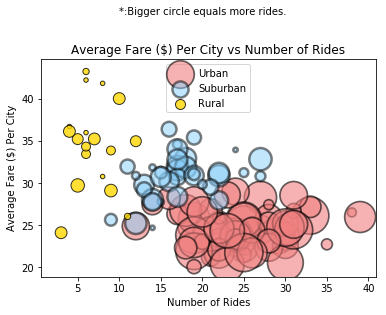

In [11]:
#Urban using the color of light coral as in insturctions, played with alpha and linewith
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.6, linewidth = 1.7)

#Suburban using the color of light sky blue as in insturctions, played with alpha and linewith
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 2.5)

#Rural using the color gold as in insturctions, played with alpha and linewith
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "Gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.8, linewidth = 1.0)

#Add title, x axis label and y axis label.
plt.title("Average Fare ($) Per City vs Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($) Per City")
plt.text(10, 50,"*:Bigger circle equals more rides.")

#Add the legend.
plt.legend(loc= "upper center")

#Show plot.
plt.show()
#Mynd you, møøse bites Kan be pretty nasti...

In [12]:
#Sum of fares by city type to use in pie chart

cityFare = myPyber_data.groupby(["type"])["fare"].sum()
cityFare
#We apologise for the fault in the subtitles. Those responsible have been sacked.

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

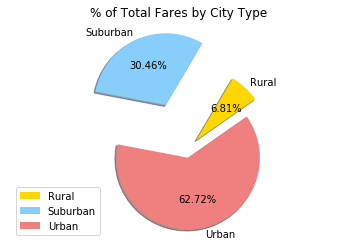

In [13]:
#colors of each section of chart per instructions.
colors = ["gold", "lightskyblue", "lightcoral"]

#playing with explode (and it's fun)
explode = (0.2,0.7, 0.1)

#make pie chart. playing with startangle, explode and shadow
plt.pie(cityFare, labels = cityFare.index, autopct = "%1.2f%%", colors = colors,startangle=35, explode = explode, shadow = True,)

#equal axes.
plt.axis("equal")

#title
plt.title("% of Total Fares by City Type")

#legend location
plt.legend(loc = "lower left")


plt.show()
#We apologise again for the fault in the subtitles. Those responsible for sacking the people who have just been sacked, have been sacked.

In [14]:
#Total rides by city type.

cityRides = myPyber_data.groupby(["type"])["ride_id"].count()
cityRides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

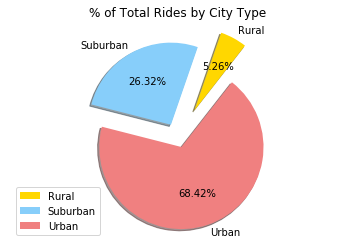

In [15]:
#colors of each section of chart per instructions.
colors = ["gold", "lightskyblue", "lightcoral"]

#playing with explode (and it's still fun)
explode = (0.4,0.2,0.1)

#make pie chart. playing with startangle, explode and shadow.
plt.pie(cityRides, labels = cityFare.index, autopct = "%1.2f%%", colors = colors,startangle=52, explode = explode, shadow = True)

#equal axes.
plt.axis("equal")

#title
plt.title("% of Total Rides by City Type")

#legend location.
plt.legend(loc = "lower left")


plt.show()

In [16]:
#driver count.
cityDrivers = myPyber_data.groupby(["type"])["driver_count"].mean()
cityDrivers

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

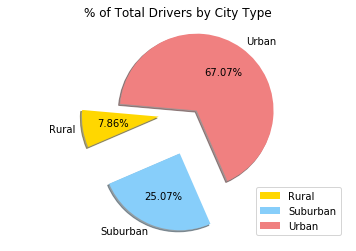

In [18]:
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#playing with explode (and it's still still fun)
explode = (0.5,0.6,0)

#Create the pie chart.
plt.pie(cityDrivers, labels = cityDrivers.index, autopct = "%1.2f%%", colors = colors,startangle=175, explode = explode, shadow = True)

#equal axes.
plt.axis("equal")

#legend location
plt.legend(loc = "lower right")

#title
plt.title("% of Total Drivers by City Type")

plt.show()

Three observable trends based on the data are:
1) The Urban areas have the highest amount of rides
2) With only 25% of the drivers in the suburban area they make up 30.46 $ of the fare
3) There are more urban drivers than there are rides by 2.6%. Recomendation is not to encurage some to go to suburban (they might make more money)